In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
from textblob import TextBlob

In [2]:
# Import celebrity twitter data csv
filepath = Path('Resources/celebrity_mbti.csv')
celebrity_df = pd.read_csv(filepath)
celebrity_df

,type,posts
0,INTJ,"""SpaceX team is doing great work! One day, the..."
1,ENTP,"""To all the Grads of 2020, you Chosen Ones! Pr..."
2,ESFP,"""What Lily is really thinking when Hannah pres..."


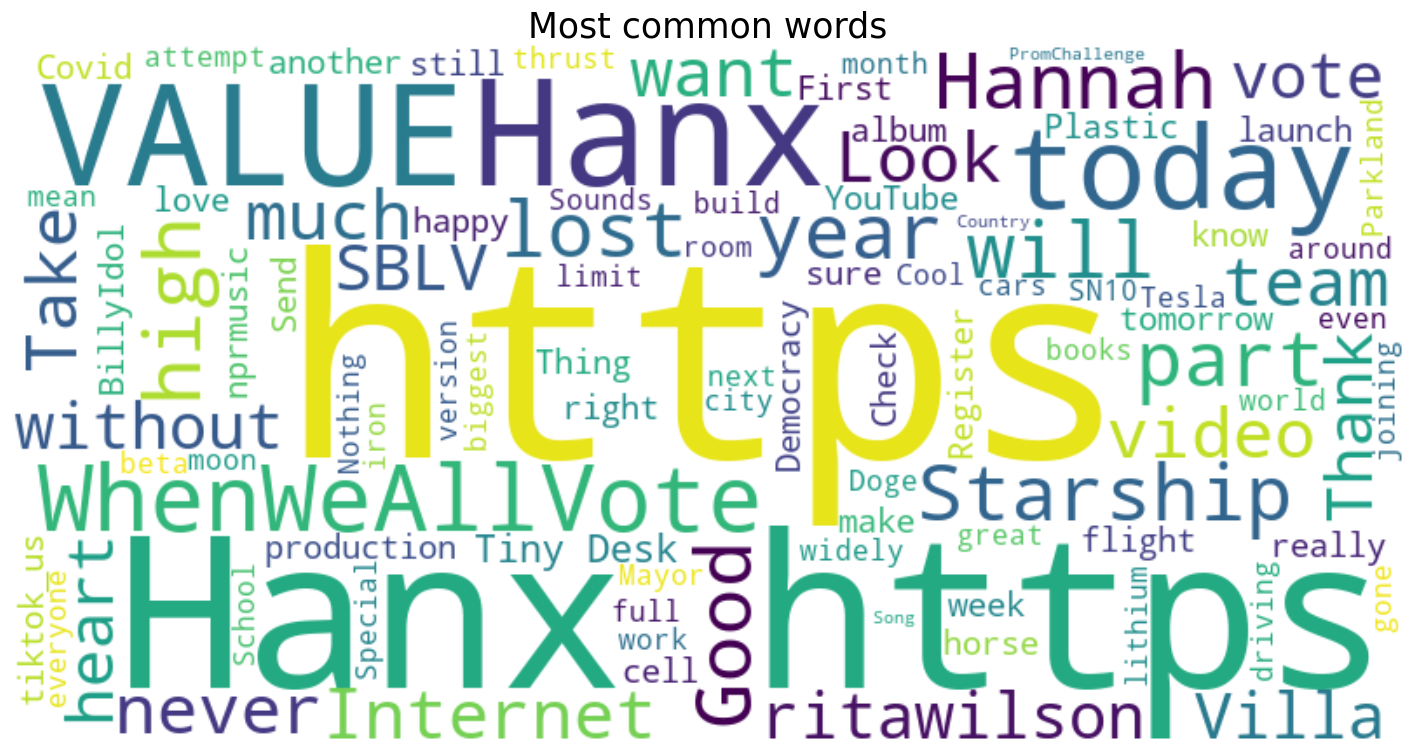

In [3]:
# Read the whole text
text = ' '.join(celebrity_df['posts'])

# Generate a word cloud image
stopwords = STOPWORDS
wordcloud = WordCloud(background_color='white', width=800, height=400, stopwords=stopwords, max_words=100, repeat=False, min_word_length=4).generate(text)

# Display the generated image:
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
sns.set_context('talk')
plt.title('Most common words', fontsize=25)
plt.show()

In [5]:
pip install tweepy


     -------------------------------------- 98.5/98.5 kB 472.1 kB/s eta 0:00:00
     ------------------------------------- 151.7/151.7 kB 14.7 kB/s eta 0:00:00


In [7]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import dependencies
import tweepy
from dotenv import load_dotenv
import os

In [5]:
load_dotenv()

False

In [6]:
# Create variables to store keys for accessing Twitter API
consumer_key = os.getenv('consumer_key')
consumer_secret = os.getenv('consumer_secret')
access_token = os.getenv('access_token')
access_token_secret = os.getenv('access_token_secret')
type(access_token_secret)

NoneType

In [9]:
access_token_secret = str(access_token_secret)
type(access_token_secret)
access_token= str(access_token)
type(access_token)
consumer_secret = str(consumer_secret)
type(consumer_secret)
consumer_key = str(consumer_key)
type(consumer_key)

str

In [10]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [28]:
# Create list of 50 tweets for selected user
username = 'jack'
user_MBTI = 'ISTP'
count = 50
tweets = tweepy.Cursor(api.user_timeline(),id=username).items(count)
tweets_list = [tweet.text for tweet in tweets]
tweets_list

Unexpected parameter: id


Unauthorized: 401 Unauthorized
89 - Invalid or expired token.

In [10]:
# Define function to remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [11]:
# Remove emojis and join tweets
tweets_string = " ".join(tweets_list)
tweets_string = remove_emoji(tweets_string)
tweets_string

"RT @moneyball: The original goal of 3-4 engineers and designers has blossomed into support for 30 people across 16 countries. https://t.co/… RT @sqcrypto: We turned 2 today. Jack’s our dad. 50/50 @EnesKanter @Twitter  RT @stevejang: 1/ earlier this week, Minari, an independent film about an Asian immigrant family living in the Deep South during 1980s, was… RT @SenSanders: Puerto Rico can no longer be treated like a colony. The people of Puerto Rico deserve the right to decide their own future,… RT @bborrman: Starting 3/19, we're asking for pubic input into how we approach world leaders on Twitter going forward. We're also engaging… RT @TwitterSupport: Starting today on iOS, we’re testing a way to watch YouTube videos directly in your Home timeline, without leaving the… beautiful work #bitcoin https://t.co/BErHZ2wUts  https://t.co/N2IznHTfHF #bitcoin first https://t.co/vd5fBRSkkn #StopAsianHate https://t.co/SI2e9ceJFq  https://t.co/vaykeMVfHn RT @mayascade: stevie wonder performing “su

In [12]:
# Create data frame
tweets_df = pd.DataFrame({
    'type': user_MBTI,
    'posts': [tweets_string]
})
tweets_df

,type,posts
0,ISTP,RT @moneyball: The original goal of 3-4 engine...


In [13]:
# Appends tweets_df to celebrity_df
celebrity_df = celebrity_df.append(tweets_df, ignore_index=True)
celebrity_df

,type,posts
0,INTJ,"""SpaceX team is doing great work! One day, the..."
1,ENTP,"""To all the Grads of 2020, you Chosen Ones! Pr..."
2,ESFP,"""What Lily is really thinking when Hannah pres..."
3,ISTP,RT @moneyball: The original goal of 3-4 engine...


In [14]:
# add features:
celebrity_df['words_per_comment'] = celebrity_df['posts'].apply(lambda x: len(x.split())/50.0)

celebrity_df['http_per_comment'] = celebrity_df['posts'].apply(lambda x: x.count('http')/50.0)
celebrity_df['img_per_comment'] = celebrity_df['posts'].apply(lambda x: x.count('jpg')/50.0)

celebrity_df['qm_per_comment'] = celebrity_df['posts'].apply(lambda x: x.count('?')/50.0)
celebrity_df['excl_per_comment'] = celebrity_df['posts'].apply(lambda x: x.count('!')/50.0)
celebrity_df['ellipsis_per_comment'] = celebrity_df['posts'].apply(lambda x: x.count('...')/50.0)

celebrity_df['E'] = celebrity_df['type'].apply(lambda x: x.count('E'))
celebrity_df['I'] = celebrity_df['type'].apply(lambda x: x.count('I'))

celebrity_df['S'] = celebrity_df['type'].apply(lambda x: x.count('S'))
celebrity_df['N'] = celebrity_df['type'].apply(lambda x: x.count('N'))

celebrity_df['F'] = celebrity_df['type'].apply(lambda x: x.count('F'))
celebrity_df['T'] = celebrity_df['type'].apply(lambda x: x.count('T'))

celebrity_df['P'] = celebrity_df['type'].apply(lambda x: x.count('P'))
celebrity_df['J'] = celebrity_df['type'].apply(lambda x: x.count('J'))

celebrity_df.head()

,type,posts,words_per_comment,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,E,I,S,N,F,T,P,J
0,INTJ,"""SpaceX team is doing great work! One day, the...",8.86,0.14,0.0,0.02,0.16,0.00,0,1,0,1,0,1,0,1
1,ENTP,"""To all the Grads of 2020, you Chosen Ones! Pr...",15.24,0.76,0.0,0.18,1.42,0.02,1,0,0,1,0,1,1,0
2,ESFP,"""What Lily is really thinking when Hannah pres...",10.94,0.74,0.0,0.08,0.80,0.02,1,0,1,0,1,0,1,0
3,ISTP,RT @moneyball: The original goal of 3-4 engine...,13.70,0.56,0.0,0.00,0.04,0.00,0,1,1,0,0,1,1,0


In [15]:
# Define cleaning and sentiment functions
def clean_phrase(phrase):
  '''
  removes links and special characters using simple regex statements.
  '''
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", phrase).split())

def get_sentiment(phrase):
  """
  classifies text as positive, neutral, or negative using textblob's sentiment method
  """
  analysis = TextBlob(clean_phrase(phrase))
  if analysis.sentiment.polarity > 0:
    return 'positive'
  elif analysis.sentiment.polarity == 0:
    return 'neutral'
  else:
    return 'negative'
                  
for index, row in celebrity_df.iterrows():
  #if (index%1000) == 0:
    #print index
  #df_train.loc[index,'sentiment'] = get_sentiment(df_train.iloc[i]['posts'])
  celebrity_df.loc[index,'sentiment'] = TextBlob(clean_phrase(celebrity_df.iloc[index]['posts'])).sentiment.polarity

celebrity_df.head()

,type,posts,words_per_comment,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,E,I,S,N,F,T,P,J,sentiment
0,INTJ,"""SpaceX team is doing great work! One day, the...",8.86,0.14,0.0,0.02,0.16,0.00,0,1,0,1,0,1,0,1,0.187692
1,ENTP,"""To all the Grads of 2020, you Chosen Ones! Pr...",15.24,0.76,0.0,0.18,1.42,0.02,1,0,0,1,0,1,1,0,0.235577
2,ESFP,"""What Lily is really thinking when Hannah pres...",10.94,0.74,0.0,0.08,0.80,0.02,1,0,1,0,1,0,1,0,0.134681
3,ISTP,RT @moneyball: The original goal of 3-4 engine...,13.70,0.56,0.0,0.00,0.04,0.00,0,1,1,0,0,1,1,0,0.275663


In [19]:
# Select stopwords and initialize lemmatizer
Stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [20]:
# Lower case personality types
personality_types = [x.lower() for x in celebrity_df["type"].unique()]
stop_words = ["hmm", "b", "c", "ahh"]

In [21]:
# Define tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(Stop)
    regex = re.compile("[^a-zA-Z ]")
    regex2 = re.compile("[…\+,'’]")
    post = re.sub(r'''https?:\/\/[^| ]+''', '', text, flags=re.MULTILINE)
    post = re.sub(r'''[0-9]+''', '', post, flags=re.MULTILINE) 
    
    # This would have removed most of the links but probably not all 
    post=post.replace('|||'," ") 

    # Remove puntuations 
    puncs1=['@','#','$','%','^','~','&','*','(',')','-','_','+','=','{','}','[',']','|','\\','"',"'",';',':','<','>','/', ',','.','?','!','\n']
    for punc in puncs1:
        post=post.replace(punc,' ') 

    # Remove extra white spaces
    text=re.sub( '\s+', ' ', post ).strip()
    text = regex2.sub('', text)
    words = word_tokenize(text)
    words = [x.lower() for x in words]
    words = [x for x in words if x not in punctuation]
    words = [x for x in words if x not in personality_types]
    words = [x for x in words if x not in stop_words]

    return [lemmatizer.lemmatize(word) for word in words if word not in sw]

In [22]:
# Tokenize data
celebrity_df["tokens"] = celebrity_df["posts"].apply(tokenizer)
celebrity_df['text'] = celebrity_df['tokens'].apply(lambda x: ' '.join(x))
celebrity_df

,type,posts,words_per_comment,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,E,I,S,N,F,T,P,J,sentiment,tokens,text
0,INTJ,"""SpaceX team is doing great work! One day, the...",8.86,0.14,0.0,0.02,0.16,0.00,0,1,0,1,0,1,0,1,0.187692,"[spacex, team, great, work, one, day, true, me...",spacex team great work one day true measure su...
1,ENTP,"""To all the Grads of 2020, you Chosen Ones! Pr...",15.24,0.76,0.0,0.18,1.42,0.02,1,0,0,1,0,1,1,0,0.235577,"[grad, chosen, one, print, sheepskin, hanx, da...",grad chosen one print sheepskin hanx day skyli...
2,ESFP,"""What Lily is really thinking when Hannah pres...",10.94,0.74,0.0,0.08,0.80,0.02,1,0,1,0,1,0,1,0,0.134681,"[lily, really, thinking, hannah, press, send, ...",lily really thinking hannah press send another...
3,ISTP,RT @moneyball: The original goal of 3-4 engine...,13.70,0.56,0.0,0.00,0.04,0.00,0,1,1,0,0,1,1,0,0.275663,"[rt, moneyball, original, goal, engineer, desi...",rt moneyball original goal engineer designer b...


In [23]:
# Create binary columns for personality types
celebrity_df["is_Extrovert"] = celebrity_df["type"].apply(
    lambda x: 1 if x[0] == "E" else 0
)
celebrity_df["is_Sensing"] = celebrity_df["type"].apply(
    lambda x: 1 if x[1] == "S" else 0
)
celebrity_df["is_Thinking"] = celebrity_df["type"].apply(
    lambda x: 1 if x[2] == "T" else 0
)
celebrity_df["is_Judging"] = celebrity_df["type"].apply(
    lambda x: 1 if x[3] == "J" else 0
)

celebrity_df

,type,posts,words_per_comment,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,E,I,...,T,P,J,sentiment,tokens,text,is_Extrovert,is_Sensing,is_Thinking,is_Judging
0,INTJ,"""SpaceX team is doing great work! One day, the...",8.86,0.14,0.0,0.02,0.16,0.00,0,1,...,1,0,1,0.187692,"[spacex, team, great, work, one, day, true, me...",spacex team great work one day true measure su...,0,0,1,1
1,ENTP,"""To all the Grads of 2020, you Chosen Ones! Pr...",15.24,0.76,0.0,0.18,1.42,0.02,1,0,...,1,1,0,0.235577,"[grad, chosen, one, print, sheepskin, hanx, da...",grad chosen one print sheepskin hanx day skyli...,1,0,1,0
2,ESFP,"""What Lily is really thinking when Hannah pres...",10.94,0.74,0.0,0.08,0.80,0.02,1,0,...,0,1,0,0.134681,"[lily, really, thinking, hannah, press, send, ...",lily really thinking hannah press send another...,1,1,0,0
3,ISTP,RT @moneyball: The original goal of 3-4 engine...,13.70,0.56,0.0,0.00,0.04,0.00,0,1,...,1,1,0,0.275663,"[rt, moneyball, original, goal, engineer, desi...",rt moneyball original goal engineer designer b...,0,1,1,0


In [24]:
# List of columns
cols = list(celebrity_df.columns.values)
cols

['type',
 'posts',
 'words_per_comment',
 'http_per_comment',
 'img_per_comment',
 'qm_per_comment',
 'excl_per_comment',
 'ellipsis_per_comment',
 'E',
 'I',
 'S',
 'N',
 'F',
 'T',
 'P',
 'J',
 'sentiment',
 'tokens',
 'text',
 'is_Extrovert',
 'is_Sensing',
 'is_Thinking',
 'is_Judging']

In [25]:
# Drop unnecessary columns
celebrity_df = celebrity_df.drop(columns = ['posts', 'tokens','E', 'I', 'S', 'N', 'F', 'T', 'P', 'J',])
celebrity_df

,type,words_per_comment,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,sentiment,text,is_Extrovert,is_Sensing,is_Thinking,is_Judging
0,INTJ,8.86,0.14,0.0,0.02,0.16,0.00,0.187692,spacex team great work one day true measure su...,0,0,1,1
1,ENTP,15.24,0.76,0.0,0.18,1.42,0.02,0.235577,grad chosen one print sheepskin hanx day skyli...,1,0,1,0
2,ESFP,10.94,0.74,0.0,0.08,0.80,0.02,0.134681,lily really thinking hannah press send another...,1,1,0,0
3,ISTP,13.70,0.56,0.0,0.00,0.04,0.00,0.275663,rt moneyball original goal engineer designer b...,0,1,1,0


In [26]:
# Export clean data to csv
celebrity_df.to_csv(r'Resources/celebrity_clean.csv', index=False)